![AES & CEE Masthead](https://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_CEE_Masthead.png)
# Accessing the THREDDS Holdings (Time Series for an aggregated region).

# Libraries

In [1]:
#################################################
#
# Library 
#

import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

import xarray            as xr

import pandas            as pd

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature


import datetime          as datetime


#
#################################################

# User Modification Area

In [2]:
#################################################
#
# User Modification Area
#

# Mask Variable

#Mask_Variable = "huc02" # Level 2 river basins (4-digits)
#Mask_Lookup   =      10 # Misouri Basin.

Mask_Variable =  "huc04" # Level 4 river basins (4-digits)
Mask_Lookup   =     1012 # Cheyenne Basin.

#Mask_Variable =  "huc06" # Level 6 river basins (4-digits)
#Mask_Lookup   =   101201 # Cheyenne Basin.

Mask_Variable =  "huc08" # Level 8 river basins (8-digits)
Mask_Lookup   = 10120110 # Rapid

#Mask_Variable = "climdiv" # NCEI Climate Divisions (4-digits)
#Mask_Lookup   =  3904     # Black  Hills ClimDiv.

# Start Date & Stop Dates

start_date = np.datetime64("2013-10-01")
stop_date  = np.datetime64("2013-10-15")

#
#################################################

# Accessing Metadata and Masks

Metadata and Masks are kept in a NetCDF Files on the TDS service.  This is a rather large file compared to the LOCA2 Files.  

In [3]:
#################################################
#
# Pull Mask for NLDAS 
#

#nldas_mask = xr.open_dataset("http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/NLDAS/NLDAS_METADATA.nc")
nldas_mask = xr.open_dataset("./NLDAS_METADATA.nc")

plot_crs = ccrs.AlbersEqualArea(central_longitude  =          -96.0,
                                  central_latitude   =         37.5,
                                  standard_parallels = (29.5, 45.5))

#
#################################################

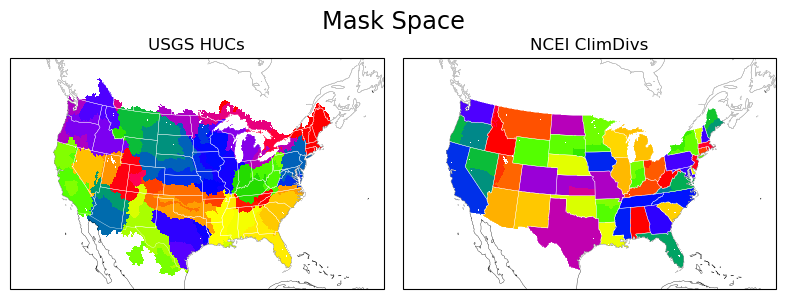

In [4]:

fig = plt.figure(figsize=[8,3] )


ax1 = plt.subplot(1,2,1,
                  projection = plot_crs)
nldas_mask["HUC_08"].where(nldas_mask["NLDAS_mask"]==1).plot(ax           =                ax1, 
                                                             cmap         =            "prism",
                                                             transform    = ccrs.PlateCarree(),
                                                             add_colorbar =              False)
ax1.coastlines( edgecolor = 'white', 
                facecolor =  'none',
                linewidth =    0.25)
ax1.add_feature(feature = cfeature.STATES, 
                edgecolor ='white', 
                facecolor = 'none',
                linewidth =   0.25)
ax1.set_extent([-125, -66.5, 20, 55])
ax1.set_title(label = "USGS HUCs")


ax2 = plt.subplot(1,2,2,
                  projection = plot_crs)
nldas_mask["CLIMDIV"].where(nldas_mask["NLDAS_mask"]==1).plot(ax           =                ax2,
                                                              cmap         =            "prism",
                                                              transform    = ccrs.PlateCarree(),
                                                              add_colorbar =              False)
ax2.coastlines( edgecolor = 'white', 
               facecolor =  'none',
               linewidth =    0.25)
ax2.add_feature(cfeature.STATES, 
               edgecolor ='white', 
               facecolor = 'none',
               linewidth =   0.25)

ax2.set_extent([-125, -66.5, 20, 55])
ax2.set_title(label = "NCEI ClimDivs")

fig.suptitle(t        = "Mask Space", 
             fontsize =   "xx-large")

plt.tight_layout()
plt.show()


# Process Mask

Mask Uses Hydrologic Boundaries
  Selecting Mask  HUC08:10120110 Rapid, Cheyenne


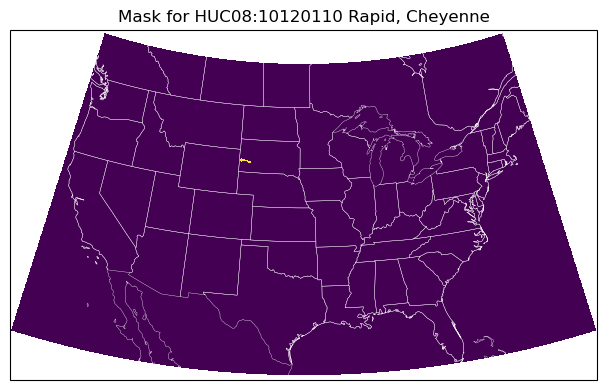

In [5]:
#################################################
#
# User Modification Area
#

# Mask Variable and Lookup Tables

if ("huc" in Mask_Variable):
    
    print("Mask Uses Hydrologic Boundaries")
    master_mask      = nldas_mask["HUC_08"].copy().where(nldas_mask["NLDAS_mask"]==1)
    master_mask_vals = np.unique(master_mask.values)   
        
    if (Mask_Variable == "huc08"):
        
        lut_values       = nldas_mask["huc08"].copy()
        lut_index_coords = lut_values.coords["huc08"].values
        mask_coords      = lut_values[lut_values==Mask_Lookup].coords["huc08"].values
        mask             = master_mask.isin(mask_coords)
        mask_name        = "HUC08:" + str(Mask_Lookup).zfill(8) + " " + str(nldas_mask[Mask_Variable+"_name"].loc[Mask_Lookup].values) + ", " + str(nldas_mask["huc06_name"].loc[Mask_Lookup].values)
        print("  Selecting Mask ", mask_name)
        
    elif (Mask_Variable == "huc06"):
        
        lut_values       = nldas_mask["huc06"].copy()
        lut_index_coords = lut_values.coords["huc08"].values        
        mask_coords      = lut_values[lut_values==Mask_Lookup].coords["huc08"].values
        mask             = master_mask.isin(mask_coords)
        mask_name       = "HUC06:" + str(Mask_Lookup).zfill(6) + " " + str(nldas_mask[Mask_Variable+"_name"].loc[mask_coords].values[0]) + ", " + str(nldas_mask["huc04_name"].loc[mask_coords].values[0])
        print("  Selecting Mask ", mask_name)
       
    elif (Mask_Variable == "huc04"):
        
        lut_values       = nldas_mask["huc04"].copy()
        lut_index_coords = lut_values.coords["huc08"].values    
        mask_coords      = lut_values[lut_values==Mask_Lookup].coords["huc08"].values
        mask             = master_mask.isin(mask_coords)
        mask_name        = "HUC04:" + str(Mask_Lookup).zfill(4) + " " + str(nldas_mask[Mask_Variable+"_name"].loc[mask_coords].values[0]) + ", " + str(nldas_mask["huc02_name"].loc[mask_coords].values[0])
        print("  Selecting Mask ", mask_name)

    else:
        
        lut_values       = nldas_mask["huc02"].copy()
        lut_index_coords = lut_values.coords["huc08"].values       
        mask_coords      = lut_values[lut_values==Mask_Lookup].coords["huc08"].values
        mask             = master_mask.isin(mask_coords)
        mask_name        = "HUC02:" + str(Mask_Lookup).zfill(2)+ " " + str(nldas_mask[Mask_Variable+"_name"].loc[mask_coords].values[0])
        print("  Selecting Mask ", mask_name)

    
        

else:
    
    master_mask       = nldas_mask["CLIMDIV"].copy().where(nldas_mask["NLDAS_mask"]==1)
    lut_values        = nldas_mask["climdiv"].copy()
    master_mask_vals  = np.unique(master_mask.values)       
    lut_index_coords  = lut_values.coords["climdiv"].values      
    mask              = master_mask.isin(Mask_Lookup)
    mask_name         = "ClimDiv " + str(nldas_mask["climdiv_name"].loc[Mask_Lookup].values) + ", " + str(nldas_mask["climdiv_state_abrv"].loc[Mask_Lookup].values)
    print("Mask uses NCEI Regions "+str(Mask_Lookup).zfill(4) + " (" + mask_name + ")")

#
#
#

fig = plt.figure(figsize =[ 8,4] )

ax  = plt.axes(projection = plot_crs)

mask.plot(ax           =                 ax, 
          transform    = ccrs.PlateCarree(),
          add_colorbar =              False)

ax.add_feature(cfeature.COASTLINE,
               edgecolor = 'white', 
               facecolor =  'none',
               linewidth =    0.25)

ax.add_feature(cfeature.STATES, 
               edgecolor ='white', 
               facecolor = 'none',
               linewidth =   0.25)

ax.set_extent([-124.0,   -68.0, 
                 21.5,    53.5])
ax.set_title(label = "Mask for " + mask_name)
ax.get_legend()
plt.tight_layout()
plt.show()

#
#################################################

## Extract Time Series

In [6]:
#http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/NLDAS/2013/10/NLDAS_NOAH_DAILY_2013-10-13.ncthredds_base_url = ""

tds_root_url = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/NLDAS/"
date_range = np.arange(start_date, stop_date + np.timedelta64(1, 'D'))


array(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
       '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
       '2013-10-09', '2013-10-10', '2013-10-11', '2013-10-12',
       '2013-10-13', '2013-10-14', '2013-10-15'], dtype='datetime64[D]')

In [23]:
date = date_range[0]

year  = date.astype('datetime64[Y]').astype(int) + 1970
month = date.astype('datetime64[M]').astype(int) % 12 + 1
day   = date - date.astype('datetime64[M]') + 1

tds_url = tds_root_url + str(year).zfill(4)  + \
                   "/" + str(month).zfill(2) + \
                   "/NLDAS_NOAH_DAILY_"      + \
                   str(date)                 + \
                   ".nc"

xf = xr.open_dataset(tds_url).where(mask == 1)

In [25]:
pd[

<xarray.Dataset> Size: 25MB
Dimensions:                                                                           (
                                                                                       soil_depth: 4,
                                                                                       lat: 224,
                                                                                       lon: 464,
                                                                                       bnds: 2,
                                                                                       time: 1)
Coordinates:
  * lon                                                                               (lon) float32 2kB ...
  * lat                                                                               (lat) float32 896B ...
  * time                                                                              (time) datetime64[ns] 8B ...
  * soil_depth                                                                        (soil_depth) float32 16B ...
Dimensions without coordinates: bnds
Data variables: (12/42)
    soil_layer_thickness                                                              (soil_depth, lat, lon) float32 2MB ...
    soil_layer_depth_bnds                                                             (soil_depth, bnds, lat, lon) float32 3MB ...
    mean_air_temperature                                                              (time, lat, lon) float32 416kB ...
    specific_humidity                                                                 (time, lat, lon) float32 416kB ...
    air_pressure                                                                      (time, lat, lon) float32 416kB ...
    eastward_wind                                                                     (time, lat, lon) float32 416kB ...
    ...                                                                                ...
    water_volume_transport_in_river_channel                                           (time, lat, lon) float32 416kB ...
    liquid_water_content_of_soil_layer                                                (time, soil_depth, lat, lon) float32 2MB ...
    mass_content_of_water_in_soil_layer                                               (time, soil_depth, lat, lon) float32 2MB ...
    soil_temperature                                                                  (time, soil_depth, lat, lon) float32 2MB ...
    maximum_air_temperature                                                           (time, lat, lon) float32 416kB ...
    minimum_air_temperature                                                           (time, lat, lon) float32 416kB ...
Attributes: (12/18)
    missing_value:                   -9999.0
    time_definition:                 hourly
    shortname:                       NLDAS_FORA0125_H_2.0
    title:                           NLDAS Primary Forcing Data L4 Hourly 0.1...
    version:                         2.0
    institution:                     NASA GSFC
    ...                              ...
    MAP_PROJECTION:                  EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:           25.0625
    SOUTH_WEST_CORNER_LON:           -124.9375
    DX:                              0.125
    DY:                              0.125
    DODS_EXTRA.Unlimited_Dimension:  time

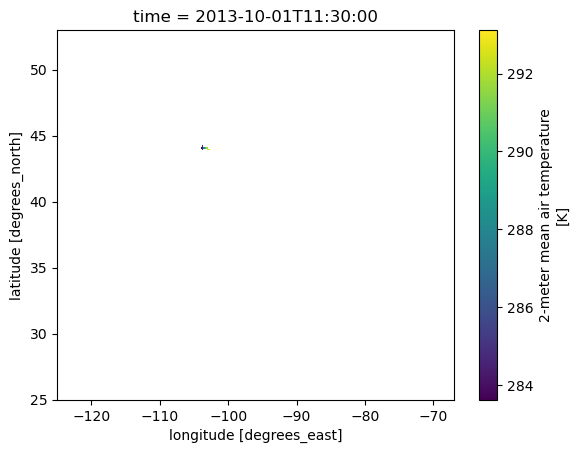

In [26]:
xf["mean_air_temperature"].plot()